Welcome to the third data of the Regression 5-Day Challenge! Over the last two days of the challenge, we've:

* [Learned about different types of regression (Poisson, linear and logistic) and when to use them](https://www.kaggle.com/rtatman/regression-challenge-day-1)
* [Learned how to fit & evaluate a model with diagnostic plots](https://www.kaggle.com/rtatman/regression-challenge-day-2)

Today, we're going to learn about how to interpret a model and how to tell whether our input variable actually does have a strong relationship to our output variable. To figure this out, we'll need to learn about a new concept: coefficients.

## What's a coefficient?

A coefficient expresses that strength of the relationship between the input value and the output value. You can read a coefficient as "for every increase of the input value by one unit, the output value will change by [whatever number the coefficient is] units". In linear regression, you can think of the coefficient as the slope of the line. Today we're going to fit a model and learn how to see and interpret its coefficients.
___

<center>
[**You can check out a video that goes with this notebook by clicking here.**](https://www.youtube.com/embed/4OnNnu6GqCs)

## Example: Can we predict how likely a hard drive is to fail?
___

Let's see if we can predict the probability that a hard drive will fail based on the Read Error Rate (which is in the column smart_1_normalized in this dataset). Intuitively, I'd expect that a hard drive is more likely to fail if the Read Error Rate is higher, i.e. there are more read errors. 

First we need to set up our environment, though.

In [1]:
# read in libraries
library(tidyverse)
library(boot)

# data. I'll use the hard_drives dataset & the cameras dataset is for you 
# to use as part of your exerise
hard_drives <- read_csv("../input/hard-drive-test-data/harddrive.csv", n_max = 100000)
cameras <- read_csv("../input/1000-cameras-dataset/camera_dataset.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.3.4          ✔ dplyr   0.7.4     
✔ tidyr   0.7.2          ✔ stringr 1.2.0     
✔ readr   1.1.1.9000     ✔ forcats 0.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = ""),
  serial_number = col_character(),
  model = col_character(),
  smart_13_normalized = col_character(),
  smart_13_raw = col_character(),
  smart_15_normalized = col_character(),
  smart_15_raw = col_character(),
  smart_201_normalized = col_character(),
  smart_201_raw = col_character(),
  smart_255_normalized = col_character(),
  smart_255_raw = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  Model = col_character()

Because "failure" is a categorical variable with two values, I'm going to use the "binomial" family to fit a logistic regression model. In this dataset 1 indicates that a hard drive did fail and 0 indicates that it didn't.

In [2]:
# predict probability of failure give the read error rate
model <- glm(failure ~ smart_1_normalized, data = hard_drives, family = "binomial")

Great, so now we have a model! But how can we tell what's going on? We can do this using the "summary" function.

> **Note:** I'd recommend doing diagnostic plots at this point, but this is a pretty big model and they took fooooorrrrever to plot, so I'm skipping them here. Don't be lazy like I'm being! :P

In [3]:
# summary of the model
summary(model)


Call:
glm(formula = failure ~ smart_1_normalized, family = "binomial", 
    data = hard_drives)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.0341  -0.0111  -0.0104  -0.0088   4.4465  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -12.861701   1.299963  -9.894  < 2e-16 ***
smart_1_normalized   0.027053   0.009005   3.004  0.00266 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 147.94  on 99999  degrees of freedom
Residual deviance: 141.74  on 99998  degrees of freedom
AIC: 145.74

Number of Fisher Scoring iterations: 12


Wow, that's a lot of output! Let's take it a bit at a time and go through it together. 

**Call**: This is just the call that you made to the function. It will be the exact same code you typed into R. This can be helpful for seeing if you made any typos.

**(Deviance) Residuals:** You can pretty much ignore these for logistic regression. For Poisson or logistic regression, you want these to be more-or-less normally distributed (which is the same thing the top two diagnostic plots are checking). You can check this by seeing if the absolute value of 1Q and 3Q are close(ish) to each other, and if the median is close to 0. The mean is not shown because it's always 0. If any of these are super off then you probably have some weird skew in your data. (This will also show up in your diagnostic plots!)

**Coefficients:** This is the meat of the output.

* **Intercept**: For Poisson and linear regression, this is the predicted output when all our inputs are 0. For logistic regression, this value will be further away from 0 the bigger the difference between the number of observation in each class.. The the standard error represents how uncertain we are about this (lower is better). In this case, because our intercept is far from 0 and our standard error is much smaller than the intercept, we can be pretty sure that one of our classes (failed or didn't fail) has a lot of more observations in it. (In this case it's "didn't fail", thankfully!)
* **Various inputs** (each input will be on a different line): This estimate represents how much we think the output will change each time we increase this input by 1. The bigger the estimate, the bigger the effect of this input variable on the output. The standard error is how certain about it we are. Usually, we can be pretty sure an input is informative is the standard error is 1/10 of the estimate.  So in this case we're pretty sure the intercept is important.
* **Signif. Codes**: This is a key to the significance of each :input and the intercept. These are only correct if you only ever fit one model to your data. (In other words, they’re great for experimental data if you from the start which variables you’re interested in and not as informative for data analysis or variable selection.)

> **Wait, why can't we use statistical significance?** You can, I just wouldn't generally recommend it. In data science you'll often be fitting multiple models using the same dataset to try and pick the best model. If you ever run more than one test for statistical significance on the same dataset, you need to adust your p-value to make up for it. You can think about it this way: if you decide that you'll accept results that are below p = 0.05, you're basically saying that you're ok with being wrong one in twenty times. If you then do five tests, however, and for each one there's a 1/20 chance that you'll be wrong, you now have a 1/4 chance of having been wrong on at least one of those tests... but you don't know which one. You can correct for it ([by multiplying the p-value you'll accept as significant by the number of tests you'll preform](http://mathworld.wolfram.com/BonferroniCorrection.html)) but in practice I find it's generally easier to avoid using p-values altogether. 

**(Dispersion parameter for binomial family taken to be 1):** You'll only see this for Poisson and binomial (logistic) regression. It's just letting you know that there has been an additional scaling parameter added to help fit the model. You can ignore it. :)

**Null deviance:** The null deviance tells us how well we can predict our output *only* using the intercept. Smaller is better.

**Residual deviance:** The residual deviance tells us how well we can predict our output using the intercept and our inputs. Smaller is better. The bigger the difference between the null deviance and residual deviance is, the more helpful our input variables were for predicting the output variable.

**AIC:** The AIC is the "Akaike information criterion" and it's an estimate of how well your model is describing the patterns in your data. It's mainly used for comparing models trained on the same dataset. If you need to pick between models, the model with the *lower* AIC is doing a better job describing the variance in the data.

**Number of Fisher Scoring iterations:** This is just a measure of how long it took to fit you model. You can safely ignore it. 

OK, that was a lot! Let's get the summary of our model again and quickly go over what this tells us.

In [4]:
# summary of the model
summary(model)


Call:
glm(formula = failure ~ smart_1_normalized, family = "binomial", 
    data = hard_drives)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.0341  -0.0111  -0.0104  -0.0088   4.4465  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -12.861701   1.299963  -9.894  < 2e-16 ***
smart_1_normalized   0.027053   0.009005   3.004  0.00266 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 147.94  on 99999  degrees of freedom
Residual deviance: 141.74  on 99998  degrees of freedom
AIC: 145.74

Number of Fisher Scoring iterations: 12


From looking at the Deviance Residuals, we can tell that there's a really big skew in our residuals. Since the mean of the residuals is always 0 (due to the way that the model is fit) the median is lower than the mean. For that matter, the 3rd quartile is lower than the mean! However, since this is logistic regression and we don't need our residuals to be normally distributed, this doesn't really matter.

From looking at the coefficients, we can tell that our classes are pretty unbalanced (because our intercept is far from 0 and our standard error is much smaller than it). We can also tell that our input, smart_1_normalized, doesn't have a very strong relationship to our output because the standard error (0.009) is more than 1/10 of our estimate (0.02). Our suspicions are confirmed when we look at the difference between the null & residual deviance: adding the smart_1_normalized term barely improved our deviance at all! 

So, based on this model, we can say that it seems like smart_1_normalized, on its own, isn't a really good predictor of whether a hard drive is going to fail or not. We can double check this intution by plotting our model.

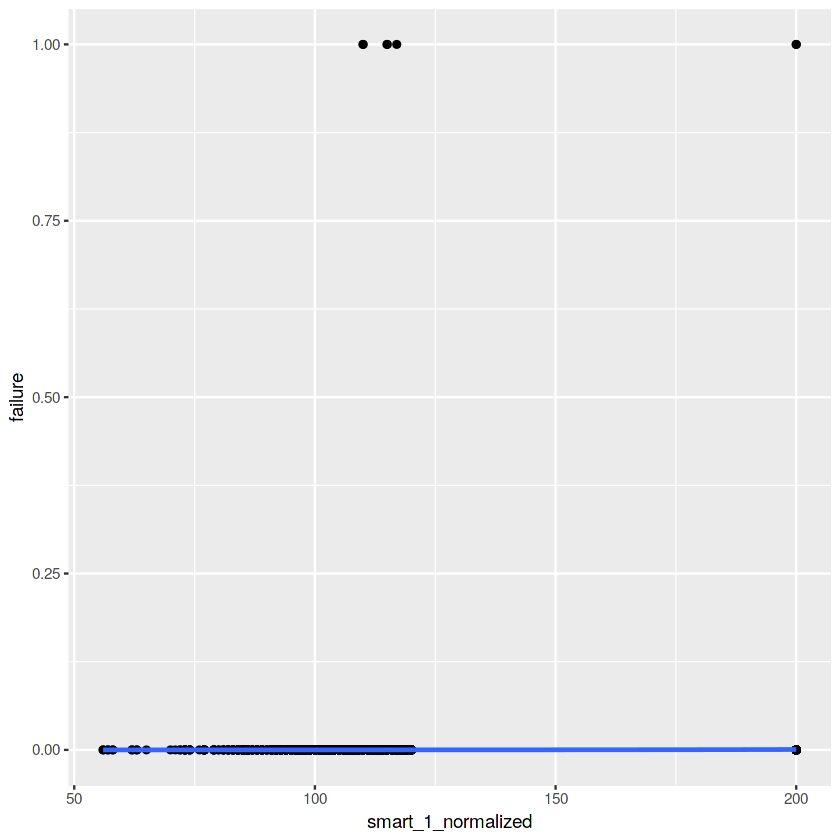

In [5]:
ggplot(hard_drives, aes(x = smart_1_normalized, y = failure)) + # draw a 
    geom_point() + # add points
    geom_smooth(method = "glm", # plot a regression...
    method.args = list(family = "binomial")) # ...from the binomial family

This plot does confirm what we've learned from our model: our classes are very imbalanced and the input variable is not that helpful. It looks like this model is pretty much always just predicting that a hard drive *won't* fail, since most hard drives don't.

## Your turn!
___

Now it's your turn to come up with a model and interpret it!

1. Pick a question to answer to using the Cameras dataset. Pick a variable to predict and one variable to use to predict it.
2. Fit a GLM model of the appropriate family. (Check out [Monday's challenge](https://www.kaggle.com/rtatman/regression-challenge-day-1) if you need a refresher).
3. *Optional but recommended:* Plot diagnostic plots for your model. Does it seem like your model is a good fit for your data? If you're fitting a linear or Poisson model, are the residuals normally distributed (no patterns in the first plot and the points in the second plot are all in a line)? Are there any influential outliers?
4. Check out your model using the summary() function. Does your input variable have a strong relationship to the output variable you're predicting?
5. Write a couple sentences describing what you've learned from your model. (It could just be that it's not a very good model!)
5. Plot your two variables & use "geom_smooth" and the appropriate family to fit and plot a model. Does this confirm what you learned from examining your model?
6. *Optional:* If you want to share your analysis with friends or to ask for help, you’ll need to make it public so that other people can see it.
    * Publish your kernel by hitting the big blue “publish” button. (This may take a second.)
    * Change the visibility to “public” by clicking on the blue “Make Public” text (right above the “Fork Notebook” button).
    * Tag your notebook with 5daychallenge

In [6]:
# summarizing the dataset
head(cameras)
summary(cameras)

Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
Agfa ePhoto 1280,1997,1024,640,0,38,114,70,40,4,420,95,179
Agfa ePhoto 1680,1998,1280,640,1,38,114,50,0,4,420,158,179
Agfa ePhoto CL18,2000,640,0,0,45,45,0,0,2,0,0,179
Agfa ePhoto CL30,1999,1152,640,0,35,35,0,0,4,0,0,269
Agfa ePhoto CL30 Clik!,1999,1152,640,0,43,43,50,0,40,300,128,1299
Agfa ePhoto CL45,2001,1600,640,1,51,51,50,20,8,270,119,179


    Model            Release date  Max resolution Low resolution
 Length:1038        Min.   :1994   Min.   :   0   Min.   :   0  
 Class :character   1st Qu.:2002   1st Qu.:2048   1st Qu.:1120  
 Mode  :character   Median :2004   Median :2560   Median :2048  
                    Mean   :2004   Mean   :2475   Mean   :1774  
                    3rd Qu.:2006   3rd Qu.:3072   3rd Qu.:2560  
                    Max.   :2007   Max.   :5616   Max.   :4992  
                                                                
 Effective pixels Zoom wide (W)   Zoom tele (T)   Normal focus range
 Min.   : 0.000   Min.   : 0.00   Min.   :  0.0   Min.   :  0.00    
 1st Qu.: 3.000   1st Qu.:35.00   1st Qu.: 96.0   1st Qu.: 30.00    
 Median : 4.000   Median :36.00   Median :108.0   Median : 50.00    
 Mean   : 4.596   Mean   :32.96   Mean   :121.5   Mean   : 44.15    
 3rd Qu.: 7.000   3rd Qu.:38.00   3rd Qu.:117.0   3rd Qu.: 60.00    
 Max.   :21.000   Max.   :52.00   Max.   :518.0   Max.   :120.00  

In [7]:
# train the model with Price against Release date
model <- glm(Price ~ `Release date`, data=cameras, family="poisson")

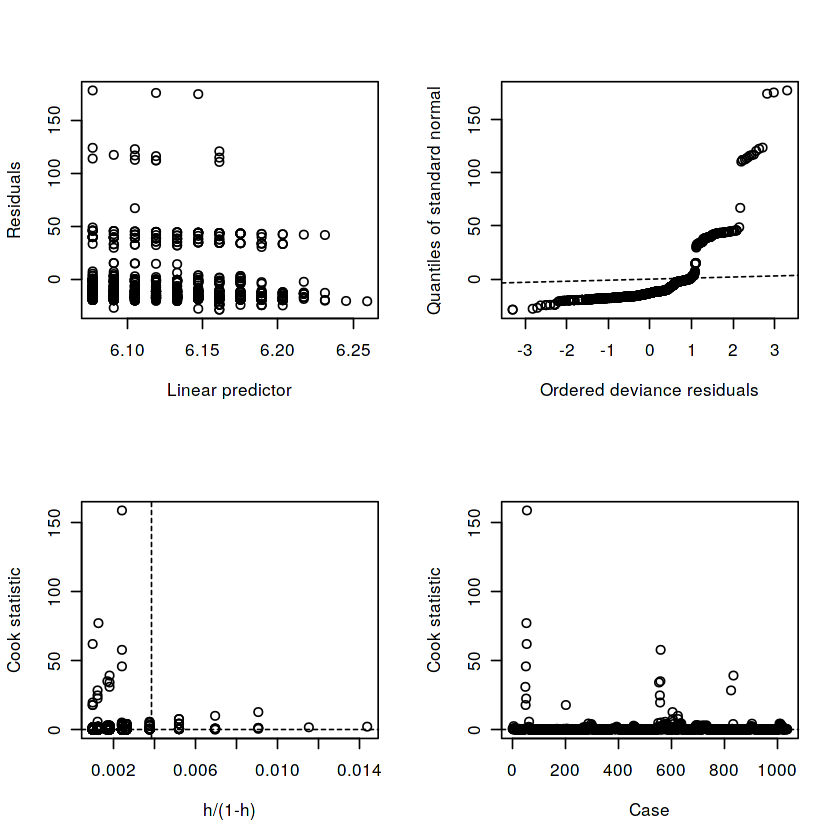

In [8]:
# diagnostic plots
glm.diag.plots(model)

In [9]:
# summarize the model
summary(model)


Call:
glm(formula = Price ~ `Release date`, family = "poisson", data = cameras)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-28.658  -16.859  -13.072   -2.384  177.283  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    34.2239784  1.0555981   32.42   <2e-16 ***
`Release date` -0.0140244  0.0005269  -26.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 633997  on 1037  degrees of freedom
Residual deviance: 633294  on 1036  degrees of freedom
AIC: 641006

Number of Fisher Scoring iterations: 6


We can infer from the *Deviance Residuals* and the *top two diagnostic plots* that the model is not a good fit. This could be probably because of the dataset. Also the difference between the *Null deviance* and *Residual deviance* is not larger and hence the impact of the feature is low.

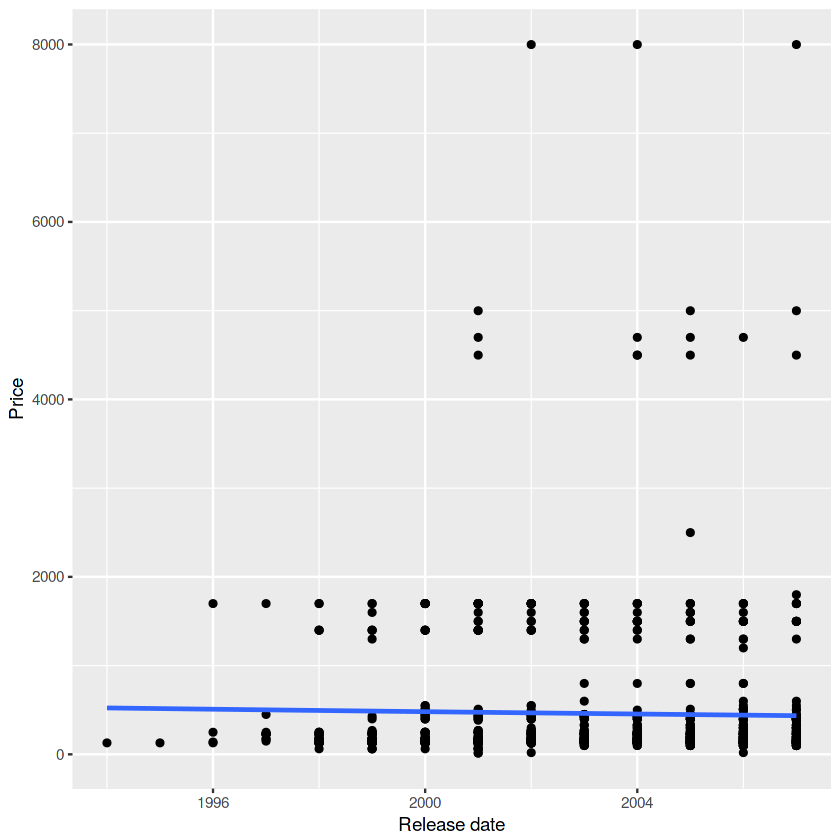

In [10]:
cameras %>%
    ggplot(aes(`Release date`, Price)) +
    geom_point() +
    geom_smooth(method="glm", method.args=list(family="poisson"))